# Association Rule on Movies

In [1]:
#importing required lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#reading the datasets
df=pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [6]:
df=df.iloc[:,5:]
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [8]:
#size of datasets
df.shape

(10, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


#Association rules with 10% Support and 70% Confidence

In [11]:
import warnings
warnings.filterwarnings('ignore')
f1=apriori(df, min_support=0.1, use_colnames=True)
f1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
#70% confidence
c1=association_rules(f1, metric='lift', min_threshold=0.7)
c1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR2, Harry Potter1, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [17]:
c1.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
225,"(LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
168,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
210,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
9,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
56,(Gladiator),"(Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
53,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [18]:
c1[c1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR2, Harry Potter1, LOTR1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


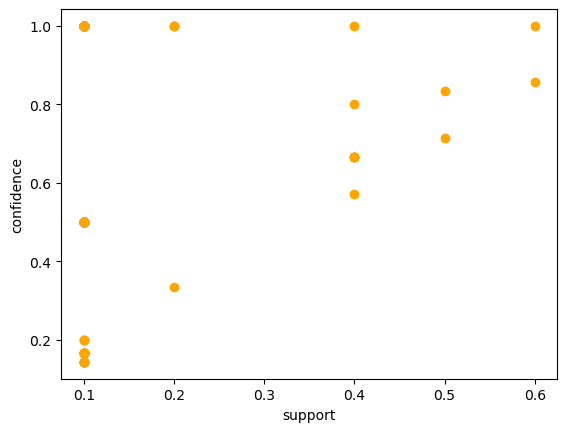

In [21]:
# visualization of obtained rule
plt.scatter(c1['support'],c1['confidence'],c='orange')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

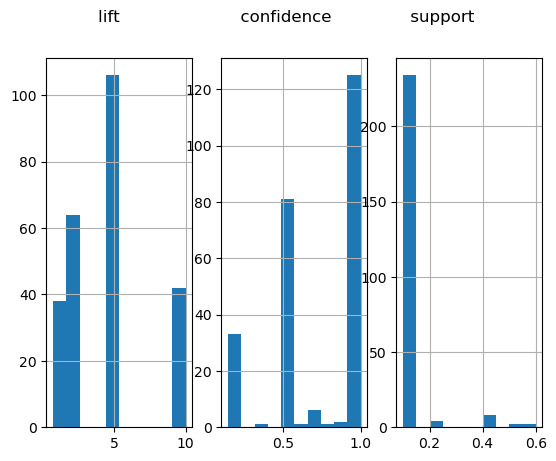

In [22]:
#ploting histogram
plt.subplot(1,3,1)
c1['lift'].hist().plot()
plt.subplot(1,3,2)
c1['confidence'].hist().plot()
plt.subplot(1,3,3)
c1['support'].hist().plot()
plt.suptitle('lift                       confidence               support');